In [3]:
import pandas as pd

customers = pd.read_json("dim_customer.json")
invoices = pd.read_csv("fct_invoice.csv")

customers.head(), invoices.head()

(    age first_name gender  id last_name
 0  48.0   Nicholas      M   0    Flores
 1   NaN    Jeffery      M   1      Rowe
 2  57.0     Alexis      F   2    Benton
 3  73.0        Amy      F   3   Johnson
 4  20.0      David      M   4     Moore,
   invoice_no  customer_id  category  quantity    price payment_method  \
 0    I138884          229  Clothing         5  1500.40    Credit Card   
 1    I317333         3433     Shoes         3  1800.51     Debit Card   
 2    I127801          644  Clothing         1   300.08           Cash   
 3    I173702         4900     Shoes         5  3000.85    Credit Card   
 4    I337046         1089     Books         4    60.60           Cash   
 
   invoice_date   shopping_mall  
 0     5/8/2022          Kanyon  
 1   12/12/2021  Forum Istanbul  
 2    9/11/2021       Metrocity  
 3   16/05/2021    Metropol AVM  
 4   24/10/2021          Kanyon  )

In [11]:
# Easy

In [6]:
# 1. How many unique customers are in the dataset?

customers['id'].nunique()

5191

In [8]:
# 2. What are the different categories of products available? How many unique categories are there?

invoices['category'].unique(), invoices['category'].nunique()

(array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
        'Toys', 'Technology', 'Souvenir'], dtype=object),
 8)

In [10]:
# 3. Which payment method is the most popular? How many times was it used?

invoices['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [16]:
# Medium

In [31]:
# 1. What are the three most popular categories, by total sales?

invoices['total'] = invoices['quantity'] * invoices['price']
invoices.groupby('category')['total'].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total, dtype: float64

In [59]:
# 2. What are the total sales attributed to customers over the age of 45?

customers_clean = customers.dropna(subset=['age'])
over_45 = customers_clean[customers_clean['age'] > 45]
merged = pd.merge(invoices, over_45, left_on='customer_id', right_on='id')
merged['total'].sum()

82039768.15

<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='invoice_date'>

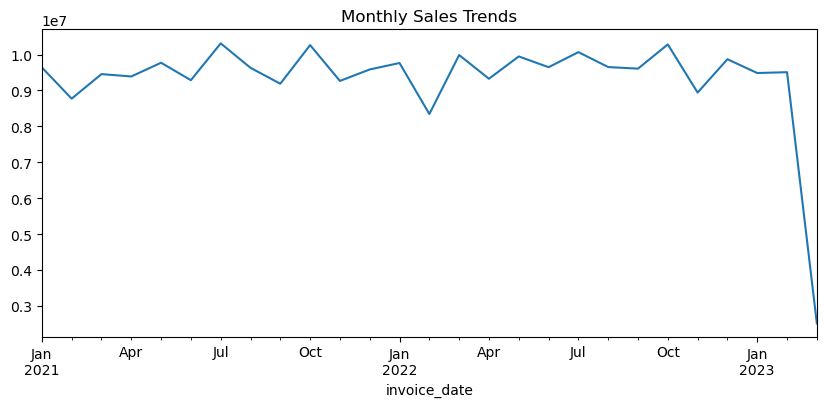

In [49]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)
invoices.set_index('invoice_date').resample('ME')['total'].sum().plot(title='Monthly Sales Trends', figsize=(10,4))

In [61]:
# Hard (Pivot table)

In [64]:
customers_clean = customers.dropna(subset=['age'])

customers_clean.loc[:, 'age_group'] = pd.cut(customers_clean['age'], bins=range(0, 101, 10))

merged_all = pd.merge(invoices, customers_clean, left_on='customer_id', right_on='id')

pivot = pd.pivot_table(
    merged_all,
    index='category',
    columns='age_group',
    values='total',
    aggfunc='sum',
    observed=False
)

pivot

/var/folders/nd/pl96yt5d7s7d5m7l6zxhf38r0000gn/T/ipykernel_57721/2045957083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_clean.loc[:, 'age_group'] = pd.cut(customers_clean['age'], bins=range(0, 101, 10))


age_group,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
category,,,,,,,,,,
Books,0.0,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95,0.0
Clothing,0.0,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04,0.0
Cosmetics,0.0,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80,0.0
Food & Beverage,0.0,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12,0.0
Shoes,0.0,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97,0.0
Souvenir,0.0,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25,0.0
Technology,0.0,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00,0.0
Toys,0.0,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00,0.0
